In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

## Loading and Cleaning with Pandas

In [2]:
def start_timer():
    global start_timer_timestamp
    start_timer_timestamp = datetime.datetime.now()

def stop_timer():
    stop_timestamp = datetime.datetime.now()
    tm_msec = (stop_timestamp - start_timer_timestamp).total_seconds() * 1000
    print(f'Time spent: {tm_msec} msec')  

In [3]:
start_timer()
review_cols = ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool']
with open('dataset/review.json', 'r', encoding="utf-8") as review:
    review_data = [json.loads(line) for line in review]
    review_df = pd.DataFrame(review_data, columns=review_cols)
    print("Loaded Reviews. Total ", review_df.size, " records")
print('loaded review_df')
stop_timer()

Loaded Reviews. Total  33158279  records
loaded review_df
Time spent: 51987.651999999995 msec


In [4]:
start_timer()   
with open('dataset/business.json', 'r', encoding="utf-8") as business:
    business_data = [json.loads(line) for line in business]
    business_df = pd.DataFrame(business_data)
    print("Loaded Businesses. Total ", business_df.size, " records")
print('loaded business_df')
stop_timer()

Loaded Businesses. Total  2349585  records
loaded business_df
Time spent: 5217.623 msec


In [5]:
user_cols = ["user_id", "review_count", "average_stars", "cool", "compliment_cool", "compliment_cute", 
             "compliment_funny", "compliment_hot", "compliment_list",
            "compliment_more", "compliment_note", "compliment_photos", 
            "compliment_plain" , "compliment_profile", "compliment_writer", "fans", 
            "funny", "useful", "yelping_since"]
start_timer()
with open('dataset/user.json', 'r', encoding="utf-8") as user:
    user_data = [json.loads(line) for line in user]
    user_df = pd.DataFrame(user_data, columns=user_cols)
    print("Loaded Users. Total ", user_df.size, " records")
print('loaded user_df')
stop_timer()

Loaded Users. Total  22483878  records
loaded user_df
Time spent: 49537.604999999996 msec


In [6]:
review_df.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool
0,VfBHSwC5Vz_pbFluy07i9Q,cjpdDjZyprfyDG3RlkVG3w,uYHaNptLzDLoV_JZ_MuzUA,5,0,0,0
1,3zRpneRKDsOPq92tq7ybAA,bjTcT8Ty4cJZhEOEo01FGA,uYHaNptLzDLoV_JZ_MuzUA,3,0,0,0
2,ne5WhI1jUFOcRn-b-gAzHA,AXgRULmWcME7J6Ix3I--ww,uYHaNptLzDLoV_JZ_MuzUA,3,0,0,0


In [7]:
business_df.head(3)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON


In [8]:
user_df.head(3)

,user_id,review_count,average_stars,cool,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,fans,funny,useful,yelping_since
0,lsSiIjAKVl-QRxKjRErBeg,272,3.80,16856,5174,284,5174,5175,78,299,1435,7829,7397,569,1834,209,16605,17019,2010-07-13
1,om5ZiponkpRqUNa3pVPiRg,2559,3.94,40110,1556,211,1556,1285,101,134,1295,162,2134,74,402,835,10882,83681,2006-01-18
2,-lGwMGHMC_XihFJNKCJNRg,277,4.72,55,15,1,15,5,0,1,11,8,20,0,1,17,4,45,2014-10-31


In [9]:
print(business_df.shape)
print(business_df.dtypes)

(156639, 15)
address          object
attributes       object
business_id      object
categories       object
city             object
hours            object
is_open           int64
latitude        float64
longitude       float64
name             object
neighborhood     object
postal_code      object
review_count      int64
stars           float64
state            object
dtype: object


In [10]:
print(user_df.shape)
print(user_df.dtypes)

(1183362, 19)
user_id                object
review_count            int64
average_stars         float64
cool                    int64
compliment_cool         int64
compliment_cute         int64
compliment_funny        int64
compliment_hot          int64
compliment_list         int64
compliment_more         int64
compliment_note         int64
compliment_photos       int64
compliment_plain        int64
compliment_profile      int64
compliment_writer       int64
fans                    int64
funny                   int64
useful                  int64
yelping_since          object
dtype: object


In [11]:
print(review_df.shape)
print(review_df.dtypes)

(4736897, 7)
review_id      object
user_id        object
business_id    object
stars           int64
useful          int64
funny           int64
cool            int64
dtype: object


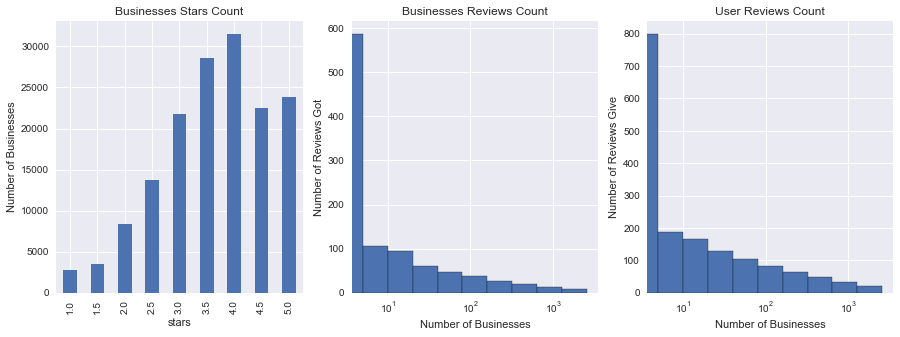

In [12]:
fig = plt.figure(figsize = (15,5))
fig.clf()
fig.subplots_adjust(hspace=.3)
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2) 
ax2 = fig.add_subplot(1, 3, 3) 

business_df.groupby('stars').size().plot(kind='bar', ax = ax0)
ax0.set_title('Businesses Stars Count')
ax0.set_ylabel('Number of Businesses')

business_review_count = business_df.groupby('review_count').size()
bins=[0, 5, 10, 20, 40, 80,160, 320, 640, 1280, 2560]
ax1.hist(business_review_count, bins=bins, edgecolor="k")
ax1.set_title('Businesses Reviews Count')
ax1.set_xlabel('Number of Businesses')
ax1.set_ylabel('Number of Reviews Got')
ax1.set_xscale('log')

business_review_count = user_df.groupby('review_count').size()
bins=[0, 5, 10, 20, 40, 80,160, 320, 640, 1280, 2560]
ax2.hist(business_review_count, bins=bins, edgecolor="k")
ax2.set_title('User Reviews Count')
ax2.set_xlabel('Number of Businesses')
ax2.set_ylabel('Number of Reviews Give')
ax2.set_xscale('log')

fig.savefig('plot1.png')

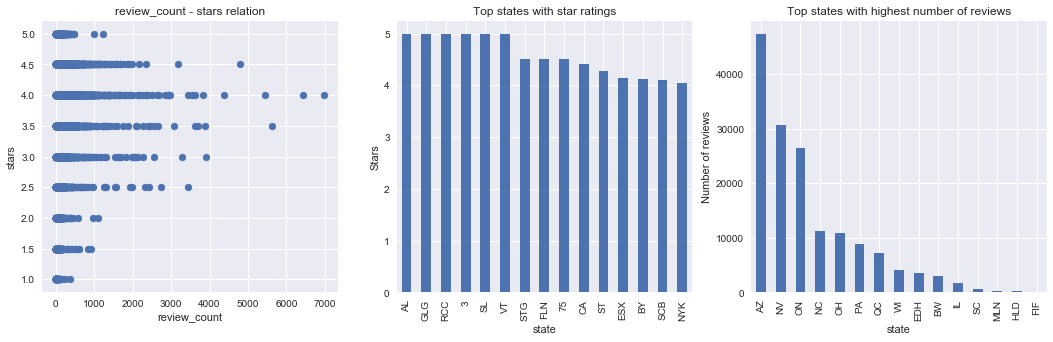

In [13]:
fig = plt.figure(figsize = (18,5))
fig.clf()
fig.subplots_adjust(hspace=.3)
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2) 
ax2 = fig.add_subplot(1, 3, 3) 

ax0.scatter(business_df['review_count'], business_df['stars'])
ax0.set_title('review_count - stars relation')
ax0.set_xlabel('review_count')
ax0.set_ylabel('stars')

business_df[['state', 'stars']].groupby('state')['stars'].agg('mean').sort_values(ascending = False).head(15).plot(kind = 'bar', ax=ax1)
ax1.set_title('Top states with star ratings')
ax1.set_ylabel('Stars')

business_df[['state', 'stars']].groupby('state')['stars'].count().sort_values(ascending = False).head(15).plot(kind = 'bar', ax=ax2)
ax2.set_title('Top states with highest number of reviews')
ax2.set_ylabel('Number of reviews')

fig.savefig('plot2.png')

## Data Selection/Cleaning

In [14]:
# First of all let's filter out closed businesses 
open_business_df = business_df[business_df['is_open'] == 1]
print("After removing businesses that are closed we left with ", open_business_df.size, " records")

# Next, filter out all none restaurant businesses, because we only care about restaurants
restaurant_df = open_business_df[open_business_df['categories'].apply(lambda x: 'Restaurants' in x)]
print("Open restaurant business records: ", restaurant_df.size)

After removing businesses that are closed we left with  1983930  records
Open restaurant business records:  579855


In [15]:
# We need to process hours column to factor out time
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
def get_hours(hours_df):
    hours = []
    
    for s in hours_df:
        open_list = []
        close_list = []
        
        for d in days:
            opn = 0.0
            cls = 0.0
            if d in s:
                hourz = s[d].split('-')
                hrs1 = hourz[0].split(':')
                hrs2 = hourz[1].split(':')

                opn = float(hrs1[0]) + float(hrs1[1])/60
                cls = float(hrs2[0]) + float(hrs2[1])/60

                # handle overnight hours
                if (opn > cls):
                    cls += 24

            open_list.append(opn)
            close_list.append(cls)
        hours.append((open_list, close_list))
    return hours

restaurant_hours = get_hours(restaurant_df['hours'])

In [16]:
print(restaurant_df.columns)

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood', 'postal_code', 'review_count', 'stars', 'state'], dtype='object')


In [17]:
# Append `business_` and `review_` prefix to all columns in restaurants and reviews dataframe 
# to distinguish columns after merge
restaurant_df.columns = ['business_' + str(col) for col in restaurant_df.columns]
review_df.columns = ['review_' + str(col) for col in review_df.columns]
# rename *_id columns back 
restaurant_df.rename(columns={"business_business_id": "business_id"}, inplace=True)
review_df.rename(columns={"review_business_id": "business_id", 
                          "review_review_id": "review_id", 
                          "review_user_id": "user_id"}, inplace=True)

In [18]:
# We need to process hours column to factor out time
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
open_close = ['_open', '_close']

def get_hours(df):
    hours = []
    for index, row in df.iterrows():
        record = {'business_id': row['business_id']}
        s = row['business_hours']
        for d in days:
            opn = 0.0
            cls = 0.0
            if d in s:
                hourz = s[d].split('-')
                hrs1 = hourz[0].split(':')
                hrs2 = hourz[1].split(':')

                opn = float(hrs1[0]) + float(hrs1[1])/60
                cls = float(hrs2[0]) + float(hrs2[1])/60

                # handle overnight hours
                if (opn > cls):
                    cls += 24

            record[str(d) + '_open'] = opn
            record[str(d) + '_close'] = cls
            
        hours.append(record)
    return hours

restaurant_hours = get_hours(restaurant_df[['business_id', 'business_hours']])

In [19]:
restaurant_hours_df = pd.DataFrame(restaurant_hours)
restaurant_df_merged = restaurant_df.merge(restaurant_hours_df, on=['business_id'])
restaurant_df_merged.head(3)

,business_address,business_attributes,business_id,business_categories,business_city,business_hours,business_is_open,business_latitude,business_longitude,business_name,business_neighborhood,business_postal_code,business_review_count,business_stars,business_state,Friday_close,Friday_open,Monday_close,Monday_open,Saturday_close,Saturday_open,Sunday_close,Sunday_open,Thursday_close,Thursday_open,Tuesday_close,Tuesday_open,Wednesday_close,Wednesday_open
0,9616 E Independence Blvd,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",SDMRxmcKPNt1AHPBKqO64Q,"[Burgers, Bars, Restaurants, Sports Bars, Nigh...",Matthews,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,35.135196,-80.714683,Applebee's,,28105,21,2.0,NC,25.0,11.0,24.0,11.0,25.0,11.0,24.0,11.0,24.0,11.0,24.0,11.0,24.0,11.0
1,190 E Dallas Rd,"{'RestaurantsAttire': 'casual', 'Alcohol': 'no...",iFEiMJoEqyB9O8OUNSdLzA,"[Chinese, Restaurants]",Stanley,"{'Monday': '11:30-22:00', 'Tuesday': '11:30-22...",1,35.355085,-81.087268,China Garden,,28164,3,3.0,NC,22.5,11.5,22.0,11.5,22.5,11.5,22.0,11.5,22.0,11.5,22.0,11.5,22.0,11.5
2,4759 Liberty Ave,"{'RestaurantsTableService': True, 'GoodForMeal...",HmI9nhgOkrXlUr6KZGZZew,"[Sandwiches, Restaurants, Italian, Diners, Bre...",Pittsburgh,"{'Sunday': '8:00-12:00', 'Tuesday': '8:00-12:0...",1,40.461350,-79.948113,Rocky's,Bloomfield,15224,15,3.0,PA,0.0,0.0,0.0,0.0,12.0,8.0,12.0,8.0,12.0,8.0,12.0,8.0,0.0,0.0


In [20]:
# Next let's take a look at all categories that has 'Restaurant'
categories = set()
restaurant_df_merged['business_categories'].apply(lambda r: categories.update(r))
# number of categories
len(categories)

635

In [21]:
# one hot encoding for categories 
def process_categories(df):
    records = []
    for index, row in df.iterrows():
        record = {'business_id': row['business_id']}
        current_cats = row['business_categories']
        for c in current_cats:
            record[c] = 1
        records.append(record)
    return records

b_cats = process_categories(restaurant_df_merged)

In [22]:
cats_df = pd.DataFrame(b_cats).fillna(0)

In [23]:
restaurant_df_merged = restaurant_df_merged.merge(cats_df, on=['business_id'])
restaurant_df_merged.head(3)

,business_address,business_attributes,business_id,business_categories,business_city,business_hours,business_is_open,business_latitude,business_longitude,business_name,business_neighborhood,business_postal_code,business_review_count,business_stars,business_state,Friday_close,Friday_open,Monday_close,Monday_open,Saturday_close,Saturday_open,Sunday_close,Sunday_open,Thursday_close,Thursday_open,Tuesday_close,Tuesday_open,Wednesday_close,Wednesday_open,Acai Bowls,Accessories,Accountants,Active Life,Acupuncture,Adult,Adult Education,Adult Entertainment,Advertising,Afghan,African,Air Duct Cleaning,Aircraft Repairs,Airport Lounges,Airport Shuttles,Airports,Airsoft,Alsatian,Amateur Sports Teams,American (New),American (Traditional),...,Travel Services,Trinidadian,Truck Rental,Turkish,Tuscan,Udon,Ukrainian,Used,Uzbek,Vacation Rentals,Vape Shops,Vegan,Vegetarian,Vehicle Wraps,Venezuelan,Venues & Event Spaces,Veterinarians,Video Game Stores,Videos & Video Game Rental,Vietnamese,Vintage & Consignment,Vinyl Records,Vinyl Siding,Vitamins & Supplements,Waffles,Walking Tours,Water Heater Installation/Repair,Water Stores,Waxing,Web Design,Wedding Chapels,Wedding Planning,Weight Loss Centers,Whiskey Bars,Wholesale Stores,Wholesalers,Wigs,Windows Installation,Windshield Installation & Repair,Wine & Spirits,Wine Bars,Wine Tasting Room,Wine Tours,Wineries,Wok,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
0,9616 E Independence Blvd,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",SDMRxmcKPNt1AHPBKqO64Q,"[Burgers, Bars, Restaurants, Sports Bars, Nigh...",Matthews,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,35.135196,-80.714683,Applebee's,,28105,21,2.0,NC,25.0,11.0,24.0,11.0,25.0,11.0,24.0,11.0,24.0,11.0,24.0,11.0,24.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,190 E Dallas Rd,"{'RestaurantsAttire': 'casual', 'Alcohol': 'no...",iFEiMJoEqyB9O8OUNSdLzA,"[Chinese, Restaurants]",Stanley,"{'Monday': '11:30-22:00', 'Tuesday': '11:30-22...",1,35.355085,-81.087268,China Garden,,28164,3,3.0,NC,22.5,11.5,22.0,11.5,22.5,11.5,22.0,11.5,22.0,11.5,22.0,11.5,22.0,11.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4759 Liberty Ave,"{'RestaurantsTableService': True, 'GoodForMeal...",HmI9nhgOkrXlUr6KZGZZew,"[Sandwiches, Restaurants, Italian, Diners, Bre...",Pittsburgh,"{'Sunday': '8:00-12:00', 'Tuesday': '8:00-12:0...",1,40.461350,-79.948113,Rocky's,Bloomfield,15224,15,3.0,PA,0.0,0.0,0.0,0.0,12.0,8.0,12.0,8.0,12.0,8.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
restaurant_df_merged.isnull().values.any()

False

In [25]:
# one hot encoding for restaurant attributes
def process_attributes(df):
    records = []
    for index, row in df.iterrows():
        attrs = row['business_attributes']
        attrs['business_id'] = row['business_id']
        records.append(attrs)
    return records

b_attrs = process_attributes(restaurant_df_merged)

In [26]:
pd.DataFrame(b_attrs).head(5)

,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,BusinessParking,ByAppointmentOnly,Caters,CoatCheck,Corkage,DietaryRestrictions,DogsAllowed,DriveThru,GoodForDancing,GoodForKids,GoodForMeal,HairSpecializesIn,HappyHour,HasTV,Music,NoiseLevel,Open24Hours,OutdoorSeating,RestaurantsAttire,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,business_id
0,NaN,NaN,full_bar,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,False,NaN,NaN,NaN,False,False,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,True,True,"{'dj': False, 'background_music': False, 'no_m...",average,NaN,False,casual,NaN,False,True,2.0,False,False,True,NaN,NaN,free,SDMRxmcKPNt1AHPBKqO64Q
1,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iFEiMJoEqyB9O8OUNSdLzA
2,NaN,NaN,none,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,False,NaN,loud,NaN,False,casual,NaN,False,False,1.0,False,True,True,NaN,NaN,no,HmI9nhgOkrXlUr6KZGZZew
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,average,NaN,True,casual,NaN,False,True,2.0,True,NaN,True,NaN,NaN,free,qnpvw-uQyRn9nlClWFK9aA
4,NaN,NaN,full_bar,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,True,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,True,True,NaN,True,no,TXiEgINSZ75d3EtvLvkc4Q


In [27]:
restaurant_df_merged = restaurant_df_merged.drop(['business_attributes', 'business_hours', 'business_categories'], axis=1)

In [28]:
restaurant_df_merged.head()

,business_address,business_id,business_city,business_is_open,business_latitude,business_longitude,business_name,business_neighborhood,business_postal_code,business_review_count,business_stars,business_state,Friday_close,Friday_open,Monday_close,Monday_open,Saturday_close,Saturday_open,Sunday_close,Sunday_open,Thursday_close,Thursday_open,Tuesday_close,Tuesday_open,Wednesday_close,Wednesday_open,Acai Bowls,Accessories,Accountants,Active Life,Acupuncture,Adult,Adult Education,Adult Entertainment,Advertising,Afghan,African,Air Duct Cleaning,Aircraft Repairs,Airport Lounges,Airport Shuttles,Airports,Airsoft,Alsatian,Amateur Sports Teams,American (New),American (Traditional),Amusement Parks,Animal Shelters,Antiques,...,Travel Services,Trinidadian,Truck Rental,Turkish,Tuscan,Udon,Ukrainian,Used,Uzbek,Vacation Rentals,Vape Shops,Vegan,Vegetarian,Vehicle Wraps,Venezuelan,Venues & Event Spaces,Veterinarians,Video Game Stores,Videos & Video Game Rental,Vietnamese,Vintage & Consignment,Vinyl Records,Vinyl Siding,Vitamins & Supplements,Waffles,Walking Tours,Water Heater Installation/Repair,Water Stores,Waxing,Web Design,Wedding Chapels,Wedding Planning,Weight Loss Centers,Whiskey Bars,Wholesale Stores,Wholesalers,Wigs,Windows Installation,Windshield Installation & Repair,Wine & Spirits,Wine Bars,Wine Tasting Room,Wine Tours,Wineries,Wok,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
0,9616 E Independence Blvd,SDMRxmcKPNt1AHPBKqO64Q,Matthews,1,35.135196,-80.714683,Applebee's,,28105,21,2.0,NC,25.0,11.0,24.0,11.0,25.0,11.0,24.0,11.0,24.0,11.0,24.0,11.0,24.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,190 E Dallas Rd,iFEiMJoEqyB9O8OUNSdLzA,Stanley,1,35.355085,-81.087268,China Garden,,28164,3,3.0,NC,22.5,11.5,22.0,11.5,22.5,11.5,22.0,11.5,22.0,11.5,22.0,11.5,22.0,11.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4759 Liberty Ave,HmI9nhgOkrXlUr6KZGZZew,Pittsburgh,1,40.461350,-79.948113,Rocky's,Bloomfield,15224,15,3.0,PA,0.0,0.0,0.0,0.0,12.0,8.0,12.0,8.0,12.0,8.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7070 Saint Barbara Boulevard,qnpvw-uQyRn9nlClWFK9aA,Mississauga,1,43.639236,-79.716199,Wild Wing,Meadowvale Village,L5W 0E6,6,2.5,ON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4502 East Towne Blvd,TXiEgINSZ75d3EtvLvkc4Q,Madison,1,43.128034,-89.307157,Red Lobster,,53704,45,3.0,WI,23.0,11.0,22.0,11.0,23.0,11.0,22.0,11.0,22.0,11.0,22.0,11.0,22.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
yelp_reviews = pd.merge(pd.merge(restaurant_df_merged, review_df, on='business_id', how='left'),
              user_df, on='user_id', how='left')
yelp_reviews.head(3)
print("Merged data frame contains ", yelp_reviews.columns.size)

Merged data frame contains  685


In [30]:
# Most of the resturants are found in Phoniex, AZ
yelp_reviews_az = yelp_reviews[yelp_reviews.business_city == 'Phoenix']

In [31]:
# parse the yelping since date to timestamps 
yelp_since_sec = pd.to_datetime(yelp_reviews_az['yelping_since']).astype(int).values
len(yelp_since_sec)

259950

In [32]:
# normalize the yelping_since column
earlist = yelp_since_sec.min()
yelp_reviews_az['yelp_since'] = yelp_since_sec / earlist

In [33]:
yelp_reviews_az.head()

,business_address,business_id,business_city,business_is_open,business_latitude,business_longitude,business_name,business_neighborhood,business_postal_code,business_review_count,business_stars,business_state,Friday_close,Friday_open,Monday_close,Monday_open,Saturday_close,Saturday_open,Sunday_close,Sunday_open,Thursday_close,Thursday_open,Tuesday_close,Tuesday_open,Wednesday_close,Wednesday_open,Acai Bowls,Accessories,Accountants,Active Life,Acupuncture,Adult,Adult Education,Adult Entertainment,Advertising,Afghan,African,Air Duct Cleaning,Aircraft Repairs,Airport Lounges,Airport Shuttles,Airports,Airsoft,Alsatian,Amateur Sports Teams,American (New),American (Traditional),Amusement Parks,Animal Shelters,Antiques,...,Walking Tours,Water Heater Installation/Repair,Water Stores,Waxing,Web Design,Wedding Chapels,Wedding Planning,Weight Loss Centers,Whiskey Bars,Wholesale Stores,Wholesalers,Wigs,Windows Installation,Windshield Installation & Repair,Wine & Spirits,Wine Bars,Wine Tasting Room,Wine Tours,Wineries,Wok,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos,review_id,user_id,review_stars,review_useful,review_funny,review_cool,review_count,average_stars,cool,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,fans,funny,useful,yelping_since,yelp_since
752,"2641 N 44th St, Ste 100",01xXe2m_z048W5gcBFpoJA,Phoenix,1,33.478043,-111.98637,Five Guys,,85008,63,3.5,AZ,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,lPpkSLWP4dtlZ588PucfXg,HyU35rUgH_SxsIb0CwTdww,2,0,0,0,272,3.51,2,0,0,0,0,0,1,0,0,1,0,0,0,0,7,2014-02-20,1.269070
753,"2641 N 44th St, Ste 100",01xXe2m_z048W5gcBFpoJA,Phoenix,1,33.478043,-111.98637,Five Guys,,85008,63,3.5,AZ,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LQjc9f7oDtxD0dRc7Ez7cA,ira4RzqjC9shmZTJEk8ZAQ,4,0,0,0,146,3.84,41,6,0,6,2,0,1,6,0,4,1,1,12,11,72,2009-05-06,1.131229
754,"2641 N 44th St, Ste 100",01xXe2m_z048W5gcBFpoJA,Phoenix,1,33.478043,-111.98637,Five Guys,,85008,63,3.5,AZ,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NB3aJt6nSCVgm3nkpK8RtQ,Jvzd19Q0xvvvdvHQ4ZQNGQ,1,0,0,0,2,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-11-29,1.320003
755,"2641 N 44th St, Ste 100",01xXe2m_z048W5gcBFpoJA,Phoenix,1,33.478043,-111.98637,Five Guys,,85008,63,3.5,AZ,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nCUh865phQuxc7Yt0tNvzw,iXGoQVfBXU0CrwrRBWXozA,3,3,1,2,327,4.30,4383,115,5,115,83,4,6,89,28,304,2,41,44,2111,4148,2010-07-08,1.164922
756,"2641 N 44th St, Ste 100",01xXe2m_z048W5gcBFpoJA,Phoenix,1,33.478043,-111.98637,Five Guys,,85008,63,3.5,AZ,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IVXVNoNSN8jdLaRLUljL6w,7o8YKxNIo8yh5jkR-tJV6w,4,0,0,0,93,3.93,4,0,0,0,0,0,0,3,0,0,0,0,4,8,54,2014-04-06,1.272613


In [34]:
# Split the training and testing dataset
mask = np.random.rand(len(yelp_reviews_az)) < 0.75
train_df = yelp_reviews_az[mask]
test_df = yelp_reviews_az[~mask]

In [35]:
# initialize train and test set 
def init_data():
    global X_train, y_train, X_test, y_test;
    X_train = train_df[['business_stars', 'average_stars', 'business_review_count',  'review_count' ,
                          'African', 'American (Traditional)' , 
                          'Vietnamese', 'Vegetarian', 
                          'Chinese' , 'Mexican', 'Indian', 
                          'Japanese', 'German',
                          'Greek', 'yelp_since']]
    y_train = train_df['review_stars']
    X_test = test_df[['business_stars', 'average_stars', 'business_review_count',  'review_count' ,
                          'African', 'American (Traditional)' , 
                          'Vietnamese', 'Vegetarian', 
                          'Chinese' , 'Mexican', 'Indian', 
                          'Japanese', 'German',
                          'Greek', 'yelp_since']]
    y_test = test_df['review_stars']

## Baseline Model

The baseline linear regression model is created by OLS api in statsmodels, which minimize the sum of the squares of the differences between the observed responses. The resulting baseline rating can be expressed by a simple linear combination of single-user bias across all restaurants and specific restaurant bias for all users. The R2_score is really low (<0.36) here, which indicating the model is not working well to recommend user restaurants. However, according to the reference for Netflix Prize, modeling these biases turned out to be fairly important. 

For example, if we already know Tom tends to rate 0.5 lower than average, and Otto Pizza is a pretty awesome restaurant that should be rated 0.7 starts higher than we normally expect. Suppose Tom and Jerry share the similar taste for food, and Jerry gave Otto Pizza with rating 4.0 stars, we could simply predict Tom’s rating for Otto Pizza would be 4.0 - 0.5 + 0.7 = 4.2

In [36]:
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.metrics import r2_score

In [37]:
# Split the training and testing dataset
mask = np.random.rand(len(yelp_reviews)) < 0.75
train_df = yelp_reviews[mask]
test_df = yelp_reviews[~mask]

In [38]:
# The baseline rating is the mean over all user-business ratings
baseline_rating = np.mean(review_df['review_stars'])

x_train = train_df[['business_stars', 'average_stars']]
x_train['const'] = baseline_rating
y_train = train_df['review_stars']

x_test = test_df[['business_stars', 'average_stars']]
x_test['const'] = baseline_rating
y_test = test_df['review_stars']

In [39]:
model = sm.OLS(y_train, x_train)
regr = model.fit()

y_trian_hat = regr.predict(x_train)
print("R2 score for train data", r2_score(y_train, y_trian_hat))

y_test_hat = regr.predict(x_test)
print("R2 score for test data", r2_score(y_test, y_test_hat))

R2 score for train data 0.35752009596
R2 score for test data 0.359754820839


In [40]:
# To predict the rating for the user that already give this business review.
user_test = train_df [train_df.user_id == 'M0cI78odeq_GKqLzk8sIrw']
x_user_test = user_test[[ 'business_stars', 'average_stars']]
x_user_test['const'] = baseline_rating
y_user_test = user_test['review_stars']

In [41]:
y_user_test_hat = regr.predict(x_user_test)

In [42]:
y_user_test_hat.head()

0         2.287769
286887    3.721762
350264    3.363264
559444    3.721762
651125    3.721762
dtype: float64

#### To recommend for the user ''M0cI78odeq_GKqLzk8sIrw", we predict the ratings for all business and then give top recommendations based on rank of ratings.

In [43]:
one_user_test = user_df[user_df.user_id == 'M0cI78odeq_GKqLzk8sIrw']

In [44]:
# To form a x_train dataframe, with this user data and ALL different business data.
one_user_test = pd.DataFrame(np.tile(one_user_test.values, len(business_df.index)).reshape(-1,len(one_user_test.columns)), 
                   columns=one_user_test.columns)
business_df = business_df.rename(columns={'stars': 'business_stars', 'name' : 'business_name', 'review_count': 'business_review_count'})
one_user_all_business_test = one_user_test.join(business_df)

In [45]:
# the x_train dataframe of the user
x_one_user_all_business_test = one_user_all_business_test[['business_stars', 'average_stars']]
x_one_user_all_business_test['const'] = baseline_rating

In [46]:
y_user_test_hat = regr.predict(x_one_user_all_business_test)
predictions_df = one_user_all_business_test
predictions_df['pred_rating'] = y_user_test_hat
predictions_df[['business_id', 'business_name', 'pred_rating']].sort_values('pred_rating', ascending=False).head(5)

,business_id,business_name,pred_rating
96523,WP--xg2QZ9W9_Jw-2Jd1SA,Arizona Biltmore Dentistry,4.43876
74681,7V4Cc-xK-fDPYYG2WkPN3w,Gentle Dental Associates & Spa,4.43876
103900,0dYiTboT1N7Sqji85Pt8wA,305 Kustoms,4.43876
97320,KxlkLRpb9gSTL1S6UnFXzw,Harbourside Fish and Chips,4.43876
97318,qlugM5IFpL1sgp27KiFTqg,MacTEK Consulting & Repairs,4.43876


#### Additional baseline predictors could be included. 

* Yelping_since field (square root); users become harsher critic over time
* Review_count in business.json
* Review_count in user.json

However, the R2 score of 0.3498 is not improved compare to the most basic basline

In [47]:
# Split the training and testing dataset
mask = np.random.rand(len(yelp_reviews_az)) < 0.75
train_df_az = yelp_reviews_az[mask]
test_df_az = yelp_reviews_az[~mask]

In [48]:
# The baseline rating is the mean over all user-business ratings
baseline_rating = np.mean(review_df['review_stars'])

x_train = train_df_az[['business_stars', 'average_stars', 'yelp_since' , 'review_count' , 'business_review_count']]
x_train['const'] = baseline_rating
y_train = train_df_az['review_stars']

x_test = test_df_az[['business_stars', 'average_stars', 'yelp_since' , 'review_count' , 'business_review_count']]
x_test['const'] = baseline_rating
y_test = test_df_az['review_stars']

In [49]:
model = sm.OLS(y_train, x_train)
regr2 = model.fit()

y_trian_hat = regr2.predict(x_train)
print("R2 score for train data", r2_score(y_train, y_trian_hat))

y_test_hat = regr2.predict(x_test)
print("R2 score for test data", r2_score(y_test, y_test_hat))

R2 score for train data 0.348162899525
R2 score for test data 0.350567872004


## Regularized Regression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [51]:
# Split the training and testing dataset
mask = np.random.rand(len(yelp_reviews_az)) < 0.75
train_df = yelp_reviews_az[mask]
test_df = yelp_reviews_az[~mask]

In [52]:
init_data()
X_train.columns

Index(['business_stars', 'average_stars', 'business_review_count', 'review_count', 'African', 'American (Traditional)', 'Vietnamese', 'Vegetarian', 'Chinese', 'Mexican', 'Indian', 'Japanese', 'German', 'Greek', 'yelp_since'], dtype='object')

With many predictors after merge, we expect number of them to be not singificant and possibly contribute to overfitting. The best way to check for which predictors are significant is to apply Regularization.
Instead of fitting a linear regression model on all predictors, we will shrink or regularize, the coefficient estimates to make sure that the model does not "overfit" the training set. We had learned 2 models that are good at regularization:
Ridge regression
Lasso regression
We need to choose shrikage parameter λ from the set {0.00001,...,100000}. We be doing it by computing R^2 score for each alpha to identify which model perfomed the best and with which alpha.

In [53]:
# result dictionary
r2_dict = {'alpha': [], 'ridge':[], 'lasso':[]}

#List of Lambda (lol!) values
lol = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]

# Find R^2 scores for each model (Linear, Lasso, Ridge) while
# varying alpha value for Lasso and Ridge models.
for alpha in lol:
    r2_dict['alpha'].append(alpha)
    lasso = Lasso(alpha=alpha, fit_intercept=True)
    lasso.fit(X_train, y_train)
    
    lasso_preds = lasso.predict(X_test)
    r2_dict['lasso'].append(r2_score(y_test, lasso_preds))
    
    ridge = Ridge(alpha=alpha, fit_intercept=True)
    ridge.fit(X_train, y_train)
    ridge_preds = ridge.predict(X_test)
    r2_dict['ridge'].append(r2_score(y_test, ridge_preds))

# build data frame and inspect data.
r2_df = pd.DataFrame(r2_dict)
r2_df.head()

,alpha,lasso,ridge
0,0.00001,0.345777,0.345778
1,0.00005,0.345778,0.345778
2,0.00010,0.345780,0.345778
3,0.00050,0.345754,0.345778
4,0.00100,0.345718,0.345778


Next, we will use principal components analysis (PCA) to fit the model. Normalizing the predictors helps in finding the proper principal components. We will be looking for number of components contributing contributing to 90% of the variance in the predictors. Next we will build PCA model using best number of principal predictors and fit the normalized model.

In [54]:
# normalize
# X_train_norm = (X_train - X_train.mean()) / (X_train.max() - X_train.min())
# X_test_norm = (X_test - X_test.mean()) / (X_test.max() - X_test.min())

pca = PCA().fit(X_train)
print('Explained variance ratio:', pca.explained_variance_ratio_)
# look for number of principal components contributing to 90% 
# of the variance in the predictors
for i in range(X_train.shape[0]):
    if pca.explained_variance_ratio_[0:i+1].sum() > 0.9:
        n_comp = i+1
        break
n_comp

Explained variance ratio: [  7.10929379e-01   2.89064697e-01   2.54445913e-06   1.24911023e-06
   7.19263720e-07   5.82536482e-07   2.28877236e-07   1.95434190e-07
   1.74336726e-07   8.70068453e-08   6.98030975e-08   4.91841874e-08
   2.02155161e-08   3.23232048e-09   1.31906328e-42]


2

In [55]:
pca = PCA(n_comp).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

pca_model = LogisticRegression().fit(X_train_pca, y_train)
y_train_pca = pca_model.predict(X_train_pca)
y_test_pca = pca_model.predict(X_test_pca)

R2_train_pca = pca_model.score(X_train_pca, y_train)
R2_test_pca = pca_model.score(X_test_pca, y_test)

print("Accuracy rate on TRAIN data: {:1.2f}%".format(R2_train_pca*100))
print("Accuracy rate on TEST data: {:1.2f}%".format(R2_test_pca*100))

Accuracy rate on TRAIN data: 44.33%
Accuracy rate on TEST data: 44.13%


## Matrix Factorization

Matrix Factorization aims to capture the latent factors. We will use Singular Value Decomposition (SVD) to create the matrices. Using SVD, we can create following three matrices:
* How much a user liked various features of the restaurant?
* Which features were offered by each restaurant?
* A weight matrix that relates the two matrices above

In [56]:
from scipy.sparse.linalg import svds

In [57]:
review_df_copy = review_df.sample(100)

In [58]:
R_df = review_df_copy.pivot(index = 'user_id', columns ='business_id', values = 'review_stars').fillna(0)
R = R_df.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [59]:
U, sigma, Vt = svds(R_demeaned, k = 50)
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns, index = R_df.index)
preds_df.head()

business_id,-F5mm0-YeCI7viSiOwVAAw,0Fs4Z2nKGzZAEM1bDlDoiQ,2NsEac9xCBI05bo5l4yI7Q,2gzB4EE7B_QEFWZtJTG4dA,2weQS-RnoOBhb1KsHKyoSQ,31RX9-VyMHcXeusGAocHrQ,3G0SJcRuHaW8kLb9Q19Wkw,3l54GTr8-E3XPbIxnF_sAA,4z2evNWOBm7b4-7Td0392A,6W3hdaCjx_n1kADEuORduA,7jhZtZjKc-uKOWsC8z7r3Q,83rwReeaAul486BuYhJ0Dw,85NJYsnJt076Nd0KwsIibg,8VmrHzfkG4yHXI-aypcF4A,9CW-rlhVXRSWj2iOnBIONw,9SU7ZZhaFUJJ6m2k5HKHeg,9o-DUVGYaoKkqnCP5BT_NA,AW3hj3neK47Jeu61dmOGVQ,AtLxMvmaIiAIwlHD588CHw,BLwZ3QyH-ubiaLQuW2AaCg,BSQgdjMm5pYSWuGyr-8pIA,BaEwrpEQyWDOOuAzu0q6Zw,BzIEV-DIrnTbAB2EtIDI4g,DBEGPVWTlI2Pyq0u_3e-bw,DYO9Uf1oLvZBX22WFZeu3g,E_eIph8IT10Uo06ZdWwoUw,EgwGTDZ705TwudPJwAY0yQ,G7kwUEmxFP_VMoGVQrl9Jg,GU0zNpgisY-pV3U2Sfdp6A,GqjC12LAufljzZmMcPSPJw,HeoiKMh2aPzWRq5ZQtSb3g,HvSliqaxluBylII59CQVBg,I6qFvR-jVDGqDD_iVG38ng,IGkxbMVWcO1WrkJjdip4OA,Ikeab75fcwNvoqjq96cVmQ,JwdaZZJeib5m1_95CRI02w,K5XjxDyq3ZIjUhbtLaW4ZQ,L-zHt7gZITG1z8l7TZ4dUg,LQIutRXeQNNZs4cdd8SBLQ,LXFVNh4G9TFRWXXjlTVFdQ,MIBkD91Wf-grrRJemqjY1w,NJ0RzuWd5xDqfJejYQZ65g,Noi53T0PWNEN9mQRS3-Ncg,OARQDsxyoGnnX2FfSl9HjA,OBMsE34bScDhsfndEZCb7Q,OBnqMdIsS8vWPrzPtnlb-w,OK0ba4X5seibH8oMWh4bhw,Pfi812k1E6TMnC1NRzH3Pg,QF2P3oJqCJC9z0TPDDFVxw,QJatAcxYgK1Zp9BRZMAx7g,QjZFYd5hme7EHegpuJngMQ,Qqu_MRaus17-4VVmzXq1_g,SLc54id9GKnHXaT_07WbFg,SZEFE5hL7aN5nM-A44iPwQ,TegwLvzoVGn-59-pGkxJGA,VGZ_MJ7P3vSQMYyQf-mNjw,WUAe0FGaLRCremEDXqNV4A,WbJ1LRQdOuYYlRLyTkuuxw,Wf1g1e9fHt25F5Cu-wI6EA,Wf91QwjXyJV_Nn7DRU68lw,XweXgLqlzVE74bW8r49AOQ,YQFcxE9UXrKc-QuTUu7twQ,Y_uwwupYT8RhwvLw3C0vCg,ZUO2WHmrYaorjPvf2D26iQ,bNCBmzL4hX8XLAwlUjD24A,cOWBLBde6AAwzBDuoa85Ag,cXdQ3H0GqcIzRgrvBEaBxw,d2ZQRjuizstCTnicysmpMQ,d5n5CsoJNu-tKEbfI6U3tA,dn51F67VLgPuqy_8SFk9oA,g_bWdMPY73k9_rj7AESe5g,goihA0c0gTfhNKmgBOHYBA,hpnFcRFzs3kg-qM1tPEg3g,hvz-FzjCOWF0hIYltzMPKQ,hxedolqDRVlKA_iOoI09Ng,irva3OiuOPA5MXgkOV1aPA,iyFS4twFjCKfaKl7kUl3sg,lJDnML8EVAc_muLXhN32Yw,mOW2adAwuFSMHXv74psg7w,n7rL5vPR5zHvTYvxcnihAg,nPgTPwWiRi_E7uW9ct8l1A,na4Th5DrNauOv-c43QQFvA,nzbQXU2x7O8oucKGthUT3g,pKk7jCFIm96qDdk0laVT2w,qa5m0hm-u1YLpvnGMCpAaw,rbH0HuTcBvZBbiAnqufRqQ,sf1rSh751u3r6FLbQx4h9w,t3DqVBZGVzprAq5ISkK8aQ,tIauOelAC3BZk_xhMoDBUg,tMYYSWyTppDcF070Hmy-kQ,twrdSnMHLMZPwti7kMzSYQ,v2tjswIV3e0c8o7_7MwYmg,v4GMlJIStwPNuO_rHSFuLw,vSJNHSWe-4VXv6U4vQnvRA,whAwdYVty-jSNRhrYT2zHA,xJUcpeOSaRQswH89D1_MlA,xlhpQvk4BsiQgn8T-KQKDw,yFKNTMyCQZ92M91A_yavhw,yooVq4aUUthr7DOQiZ7yEA,zS3-CKZVVvUYvasJnAg-aA
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-GfVotKwVsob_0NLwyv6OA,0.027901,0.012886,0.027901,0.021749,0.027901,0.012886,0.022071,0.012886,0.012886,0.022071,0.012886,0.012886,0.027901,0.022991,0.027901,0.012886,0.027901,0.022071,0.027901,0.012886,0.021749,0.022991,0.027901,0.021749,0.022071,0.027901,0.012886,0.012886,0.027901,0.012886,0.027901,0.012886,0.021749,0.021749,0.012886,0.021749,0.027901,0.022991,0.012886,0.012886,0.021749,0.027901,0.012886,0.027901,0.021749,0.012886,0.012886,0.021749,0.012886,0.027901,0.027901,0.027901,0.027901,0.022991,0.022991,0.027901,0.012886,0.012886,0.022071,0.021749,0.012886,0.027901,0.012886,0.027901,0.012886,0.012886,0.012886,0.027901,0.021749,0.027901,0.012886,0.012886,0.021749,0.012886,0.027901,0.012886,0.027901,0.012886,0.012886,0.021749,0.012886,0.027901,0.012886,0.012886,0.027901,0.012886,0.012886,0.012886,0.027901,0.022991,0.012886,0.022991,0.027901,0.012886,0.022991,0.012886,0.027901,0.021749,0.012886,0.022991
15HQIKBadXrteo7E4DbMHw,-0.059251,-0.014266,-0.556184,0.053341,0.025852,-0.014266,0.055801,-0.014266,-0.014266,0.055801,-0.014266,-0.014266,-0.251344,0.062815,0.567486,-0.014266,0.028125,0.055801,-0.159167,-0.014266,0.053341,0.062815,-0.399954,0.053341,0.055801,0.317608,-0.014266,-0.014266,-0.578170,-0.014266,-0.212945,-0.014266,0.053341,0.053341,-0.014266,0.053341,0.676915,0.062815,-0.014266,-0.014266,0.053341,-0.324982,-0.014266,0.192888,0.053341,-0.014266,-0.014266,0.053341,-0.014266,0.169255,1.798369,0.112477,0.012674,0.062815,0.062815,0.233329,-0.014266,-0.014266,0.055801,0.053341,-0.014266,0.397445,-0.014266,0.087603,-0.014266,-0.014266,-0.0142

In [60]:
sorted_user_predictions = preds_df.iloc[0].sort_values(ascending=False)
raw_rec = pd.DataFrame(sorted_user_predictions).reset_index()
preds_df.head()

business_id,-F5mm0-YeCI7viSiOwVAAw,0Fs4Z2nKGzZAEM1bDlDoiQ,2NsEac9xCBI05bo5l4yI7Q,2gzB4EE7B_QEFWZtJTG4dA,2weQS-RnoOBhb1KsHKyoSQ,31RX9-VyMHcXeusGAocHrQ,3G0SJcRuHaW8kLb9Q19Wkw,3l54GTr8-E3XPbIxnF_sAA,4z2evNWOBm7b4-7Td0392A,6W3hdaCjx_n1kADEuORduA,7jhZtZjKc-uKOWsC8z7r3Q,83rwReeaAul486BuYhJ0Dw,85NJYsnJt076Nd0KwsIibg,8VmrHzfkG4yHXI-aypcF4A,9CW-rlhVXRSWj2iOnBIONw,9SU7ZZhaFUJJ6m2k5HKHeg,9o-DUVGYaoKkqnCP5BT_NA,AW3hj3neK47Jeu61dmOGVQ,AtLxMvmaIiAIwlHD588CHw,BLwZ3QyH-ubiaLQuW2AaCg,BSQgdjMm5pYSWuGyr-8pIA,BaEwrpEQyWDOOuAzu0q6Zw,BzIEV-DIrnTbAB2EtIDI4g,DBEGPVWTlI2Pyq0u_3e-bw,DYO9Uf1oLvZBX22WFZeu3g,E_eIph8IT10Uo06ZdWwoUw,EgwGTDZ705TwudPJwAY0yQ,G7kwUEmxFP_VMoGVQrl9Jg,GU0zNpgisY-pV3U2Sfdp6A,GqjC12LAufljzZmMcPSPJw,HeoiKMh2aPzWRq5ZQtSb3g,HvSliqaxluBylII59CQVBg,I6qFvR-jVDGqDD_iVG38ng,IGkxbMVWcO1WrkJjdip4OA,Ikeab75fcwNvoqjq96cVmQ,JwdaZZJeib5m1_95CRI02w,K5XjxDyq3ZIjUhbtLaW4ZQ,L-zHt7gZITG1z8l7TZ4dUg,LQIutRXeQNNZs4cdd8SBLQ,LXFVNh4G9TFRWXXjlTVFdQ,MIBkD91Wf-grrRJemqjY1w,NJ0RzuWd5xDqfJejYQZ65g,Noi53T0PWNEN9mQRS3-Ncg,OARQDsxyoGnnX2FfSl9HjA,OBMsE34bScDhsfndEZCb7Q,OBnqMdIsS8vWPrzPtnlb-w,OK0ba4X5seibH8oMWh4bhw,Pfi812k1E6TMnC1NRzH3Pg,QF2P3oJqCJC9z0TPDDFVxw,QJatAcxYgK1Zp9BRZMAx7g,QjZFYd5hme7EHegpuJngMQ,Qqu_MRaus17-4VVmzXq1_g,SLc54id9GKnHXaT_07WbFg,SZEFE5hL7aN5nM-A44iPwQ,TegwLvzoVGn-59-pGkxJGA,VGZ_MJ7P3vSQMYyQf-mNjw,WUAe0FGaLRCremEDXqNV4A,WbJ1LRQdOuYYlRLyTkuuxw,Wf1g1e9fHt25F5Cu-wI6EA,Wf91QwjXyJV_Nn7DRU68lw,XweXgLqlzVE74bW8r49AOQ,YQFcxE9UXrKc-QuTUu7twQ,Y_uwwupYT8RhwvLw3C0vCg,ZUO2WHmrYaorjPvf2D26iQ,bNCBmzL4hX8XLAwlUjD24A,cOWBLBde6AAwzBDuoa85Ag,cXdQ3H0GqcIzRgrvBEaBxw,d2ZQRjuizstCTnicysmpMQ,d5n5CsoJNu-tKEbfI6U3tA,dn51F67VLgPuqy_8SFk9oA,g_bWdMPY73k9_rj7AESe5g,goihA0c0gTfhNKmgBOHYBA,hpnFcRFzs3kg-qM1tPEg3g,hvz-FzjCOWF0hIYltzMPKQ,hxedolqDRVlKA_iOoI09Ng,irva3OiuOPA5MXgkOV1aPA,iyFS4twFjCKfaKl7kUl3sg,lJDnML8EVAc_muLXhN32Yw,mOW2adAwuFSMHXv74psg7w,n7rL5vPR5zHvTYvxcnihAg,nPgTPwWiRi_E7uW9ct8l1A,na4Th5DrNauOv-c43QQFvA,nzbQXU2x7O8oucKGthUT3g,pKk7jCFIm96qDdk0laVT2w,qa5m0hm-u1YLpvnGMCpAaw,rbH0HuTcBvZBbiAnqufRqQ,sf1rSh751u3r6FLbQx4h9w,t3DqVBZGVzprAq5ISkK8aQ,tIauOelAC3BZk_xhMoDBUg,tMYYSWyTppDcF070Hmy-kQ,twrdSnMHLMZPwti7kMzSYQ,v2tjswIV3e0c8o7_7MwYmg,v4GMlJIStwPNuO_rHSFuLw,vSJNHSWe-4VXv6U4vQnvRA,whAwdYVty-jSNRhrYT2zHA,xJUcpeOSaRQswH89D1_MlA,xlhpQvk4BsiQgn8T-KQKDw,yFKNTMyCQZ92M91A_yavhw,yooVq4aUUthr7DOQiZ7yEA,zS3-CKZVVvUYvasJnAg-aA
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-GfVotKwVsob_0NLwyv6OA,0.027901,0.012886,0.027901,0.021749,0.027901,0.012886,0.022071,0.012886,0.012886,0.022071,0.012886,0.012886,0.027901,0.022991,0.027901,0.012886,0.027901,0.022071,0.027901,0.012886,0.021749,0.022991,0.027901,0.021749,0.022071,0.027901,0.012886,0.012886,0.027901,0.012886,0.027901,0.012886,0.021749,0.021749,0.012886,0.021749,0.027901,0.022991,0.012886,0.012886,0.021749,0.027901,0.012886,0.027901,0.021749,0.012886,0.012886,0.021749,0.012886,0.027901,0.027901,0.027901,0.027901,0.022991,0.022991,0.027901,0.012886,0.012886,0.022071,0.021749,0.012886,0.027901,0.012886,0.027901,0.012886,0.012886,0.012886,0.027901,0.021749,0.027901,0.012886,0.012886,0.021749,0.012886,0.027901,0.012886,0.027901,0.012886,0.012886,0.021749,0.012886,0.027901,0.012886,0.012886,0.027901,0.012886,0.012886,0.012886,0.027901,0.022991,0.012886,0.022991,0.027901,0.012886,0.022991,0.012886,0.027901,0.021749,0.012886,0.022991
15HQIKBadXrteo7E4DbMHw,-0.059251,-0.014266,-0.556184,0.053341,0.025852,-0.014266,0.055801,-0.014266,-0.014266,0.055801,-0.014266,-0.014266,-0.251344,0.062815,0.567486,-0.014266,0.028125,0.055801,-0.159167,-0.014266,0.053341,0.062815,-0.399954,0.053341,0.055801,0.317608,-0.014266,-0.014266,-0.578170,-0.014266,-0.212945,-0.014266,0.053341,0.053341,-0.014266,0.053341,0.676915,0.062815,-0.014266,-0.014266,0.053341,-0.324982,-0.014266,0.192888,0.053341,-0.014266,-0.014266,0.053341,-0.014266,0.169255,1.798369,0.112477,0.012674,0.062815,0.062815,0.233329,-0.014266,-0.014266,0.055801,0.053341,-0.014266,0.397445,-0.014266,0.087603,-0.014266,-0.014266,-0.0142

In [61]:
def recommend_business(predictions_df, user_id, business_df, original_ratings_df, num_recommendations=5):
    sorted_user_predictions = predictions_df.loc[user_id].sort_values(ascending=False)
    recommendations = (business_df.merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'business_id',
               right_on = 'business_id').
         rename(columns = {user_id: 'Predictions'}).
        sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations])
    return recommendations

In [63]:
# Make 10 recommendations for user '-GfVotKwVsob_0NLwyv6OA'
predictions = recommend_business(preds_df, '-GfVotKwVsob_0NLwyv6OA', business_df, review_df, 5)
predictions

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,business_name,neighborhood,postal_code,business_review_count,business_stars,state,Predictions
33130,836 W St. Clair Ave,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",QjZFYd5hme7EHegpuJngMQ,"[Restaurants, Tapas/Small Plates, Wine Bars, N...",Cleveland,"{'Monday': '16:00-1:00', 'Tuesday': '16:00-1:0...",0,41.499380,-81.699721,D'Vine Wine Bar,Warehouse District,44113,43,3.5,OH,0.027901
106721,3146 E Camelback Rd,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",NJ0RzuWd5xDqfJejYQZ65g,"[Restaurants, Bars, Nightlife, Sushi Bars, Ame...",Phoenix,"{'Monday': '11:00-2:00', 'Tuesday': '11:00-2:0...",1,33.510149,-112.013949,Delux,,85016,875,4.0,AZ,0.027901
68292,4178 Koval Ln,"{'RestaurantsTableService': True, 'GoodForMeal...",dn51F67VLgPuqy_8SFk9oA,"[American (Traditional), Restaurants]",Las Vegas,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1,36.113025,-115.163485,Ellis Island Cafe,Eastside,89109,504,3.5,NV,0.027901
6947,9425 Leslie St,"{'GoodForMeal': {'dessert': False, 'latenight'...",BzIEV-DIrnTbAB2EtIDI4g,"[Barbeque, Restaurants]",Richmond Hill,{},1,43.866270,-79.386486,Excellent Bbq Restaurant,,L4B 3N7,22,4.0,ON,0.027901
24983,"505 Highway 7 E, Unit 238, Building B","{'RestaurantsTableService': True, 'GoodForMeal...",VGZ_MJ7P3vSQMYyQf-mNjw,"[Chinese, Restaurants, Food, Dim Sum]",Markham,"{'Monday': '9:00-23:00', 'Friday': '9:00-23:00...",0,43.843031,-79.387761,King Dragon Cuisine,,L3T 7T1,47,3.0,ON,0.027901


## Ensemble

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement

In [64]:
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from itertools import product
from collections import OrderedDict

from IPython.display import *

In [65]:
init_data()

In [66]:
X_train.shape

(194881, 15)

In [67]:
def ensemble(Xtrain, ytrain, param_dict):
#     n_estimators is the number of trees in the forest.
# The number of features to consider when looking for the best split. 
# Here max_features is a percentage and int(max_features * n_features) features are considered at each split.
    start_timer()
    results = {}
    estimators= {}
    for n, f in product(*param_dict.values()):
        params = (n, f)
        print(f'Creating RandomForestRegressor using {n} estimators and {f}% max features: ')
        est = RandomForestRegressor(oob_score=True, 
                                    n_estimators=n, max_features=f, n_jobs=-1)
        est.fit(Xtrain, ytrain)
        results[params] = est.oob_score_
        print('OOB score is:', est.oob_score_)
        estimators[params] = est
    print(results)
    outparams = max(results, key = results.get)
    stop_timer()
    print(outparams)
    
    # get the regressor corresponding to the outparams
    rf1 = estimators[outparams]
    return (rf1,results)

In [68]:
param_dict = OrderedDict(
        n_estimators = [50, 100, 200],
        max_features = [0.2, 0.4]
    )
rf1 = ensemble(X_train, y_train, param_dict)

Creating RandomForestRegressor using 50 estimators and 0.2% max features: 
OOB score is: 0.291515800251
Creating RandomForestRegressor using 50 estimators and 0.4% max features: 
OOB score is: 0.291189448212
Creating RandomForestRegressor using 100 estimators and 0.2% max features: 
OOB score is: 0.311966218049
Creating RandomForestRegressor using 100 estimators and 0.4% max features: 
OOB score is: 0.309594158171
Creating RandomForestRegressor using 200 estimators and 0.2% max features: 
OOB score is: 0.319990230992
Creating RandomForestRegressor using 200 estimators and 0.4% max features: 
OOB score is: 0.31841837413
{(50, 0.2): 0.2915158002506627, (50, 0.4): 0.29118944821180537, (100, 0.2): 0.31196621804922364, (100, 0.4): 0.30959415817116798, (200, 0.2): 0.31999023099200796, (200, 0.4): 0.31841837413037344}
Time spent: 68917.66 msec
(200, 0.2)


Train R-squared using RandomForestRegression is: 0.906737849494
Test R-squared using RandomForestRegression is: 0.320851843524


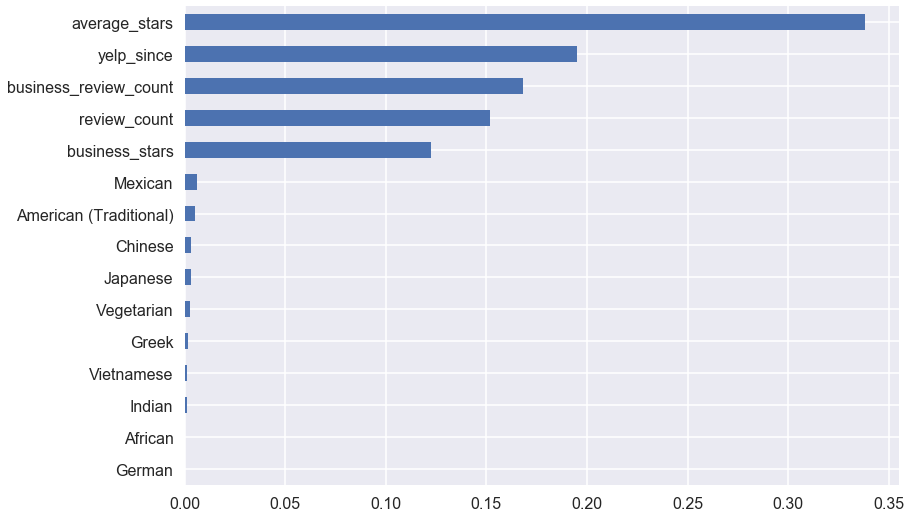

In [69]:
# Compute the R squared on training and test datasets
print('Train R-squared using RandomForestRegression is:', rf1[0].score(X_train, y_train))
print('Test R-squared using RandomForestRegression is:', rf1[0].score(X_test, y_test))

# Show Top-25 most important features
features = list(X_train.columns)
sns.set_context("poster")
pd.Series(rf1[0].feature_importances_, index=features).nlargest(n=25).sort_values().plot(kind="barh"); 

In [70]:
# Predict the rating using the random forest regressor:
rf1[0].predict(X_test)

array([ 3.995,  2.725,  1.595, ...,  3.245,  4.985,  2.925])

## Summary

### Data: 
3 of the 6 yelp datasets that we are interested are consist of records:
Reviews - 42,632,073
Businesses - 2,349,585
Users - 2,6033,964
Running EDA on entire data set seemed to be a problem due to somewhat large datasets. On our fastest laptop - we could wait over 15 mins for one plot to finish. Hence, we cleaned business dataset by filtering out all businesses that are closed. While they can provide some interest to us, we believe that size of the population isn't a problem given the initial data size (42.6 m). 

In addition, we had filtered out businesses that don't have Restaurant in their categories, since based on our project goal we are focusing just on restaurant businesses. Hence, we ended up with 579,855 records which is 1.36% from our initial input for bussiness. 

After that we have build a data frame by joining reviews with business through business_id (left outer join) result was then joined with user data frame by user_id (also left outer join). Before we joined 3 data frames, we renamed columns to be prefixed with original dataframe name. This was done to avoid confusion betwen review rating and business rating. After merge we ended up with 44 columns. Not all of those columns will be used in training data set. 

For the next step, we built 4 models (baseline, regularized regression using Ridge and Lasso, matrix factorization and Random Forrest) to predict star rating for a given restaurant. 

### BEST MODEL
Here is the comparison of train and test R2 for all the models. The best model is PCA with number of components = 2. These two components were able to explain the 90% of variance. For Ensemble, the training R2 is quite high but the test R2 is low. This clearly indicates overfitting.

### STRENGTHS AND SHORTCOMINGS

The biggest strength of PCA is its simplicity. PCA does not require much memory and processing power. Using PCA we were able to explain 90% of variance using just two components.Therefore, the resulting model was simple and fast. 
The downside of PCA is that the results cannot be explained using a flow chart. We don't know which features are captured in these two components. 

### FURTHER IMPROVEMENTS

Test R2 for RandomForestRegressor were quite disappointing when compared with PCA. It would be good to try AdaBoost and compare it with the PCA results. 
We can use natural language processing and sentiment analysis on the "text" field of the review.json. We can generate positivity scores for words either globally or per-category. We can create a social networks using the friends field for the reviewer and make predictions based on the social network.